# Data Exploration

We will be inspecting the following features of the film industry:

- Budget Allocation
- Genre
- Release Window
- Runtime
- Director

During our exploration we will identify some recommendations for our client.

We'll mainly be looking at profit because it is the magnitude of our success a larger profit is better. We'll also need 
profit margin, because it is a standardized score, that will tell us the proportionate success of the movie.  
Our profit margin can also be used as our measure of risk.

In [1]:
# ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.2)

In [3]:
# load our cleaned data and display head
df = pd.read_csv("../data/interim/cleaned_data.csv")
display(df.head())

,movie,production_budget,profit,profit_margin,release_date,runtime_minutes,genres,director
0,Avatar,425000000.0,3.111853e+09,7.322007,2009-12-18,93.0,Horror,Atsushi Wada
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,8.761278e+08,2.133774,2011-05-20,136.0,Action,Rob Marshall
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,8.761278e+08,2.133774,2011-05-20,136.0,Adventure,Rob Marshall
3,Pirates of the Caribbean: On Stranger Tides,410600000.0,8.761278e+08,2.133774,2011-05-20,136.0,Fantasy,Rob Marshall
4,Dark Phoenix,350000000.0,-1.574753e+08,-0.449929,2019-06-07,113.0,Action,Simon Kinberg


## Genre

When exploring genre we will be looking to identify which genre clearly is most successful.  
To identify which genre performs the best, we'll be viewing the distribution of profit_margin for each genre.

One thing to note about our data is that movies can have multiple genres. For our analysis we'll allow these duplicates to exist since we can't identify a primary genre.

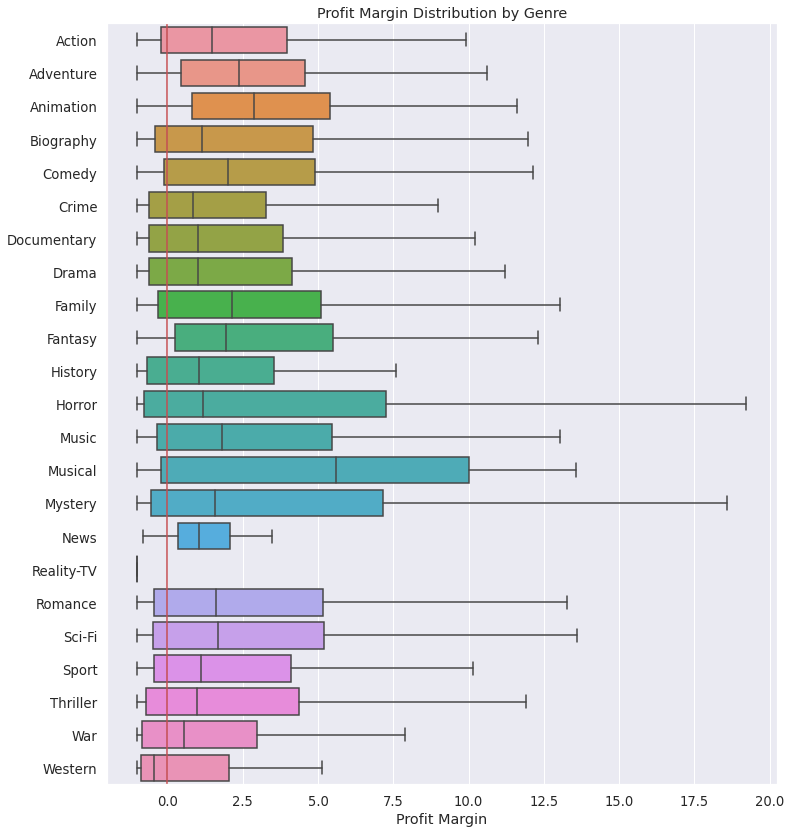

In [4]:
# generate boxplots for each genres profit margin
fig, ax = plt.subplots(figsize=(12, 14))

# make our boxplot
sns.boxplot(
    "profit_margin",
    y="genres",
    data=df,
    ax=ax,
    order=df.genres.sort_values().unique()[:-1],
    showfliers=False,
)

# adjust y axis
locs, _ = plt.yticks()
plt.ylabel("")

# add vertical line
plt.axvline(x=0, ymin=locs[0], ymax=locs[-1], color="r")

# adjust x axis
plt.xlabel("Profit Margin")

# Add title
plt.title("Profit Margin Distribution by Genre")

plt.show()

The boxplot of profit margin by genre, shows us that all genres have risk associated with them. However, there are certain genres which have a lower risk compared to others. We can identify those genres as the ones which don't have the red line intersecting their interquantile range.  
Those genres are:

1. Animation
2. Adventure
3. Fantasy

Of these genres we'll plot the average of profit and try to identify which genre would be best to produce a movie in.

Note: We left off News from the genre list as news isn't something that can be manufactured/produced by a studio necessarily.

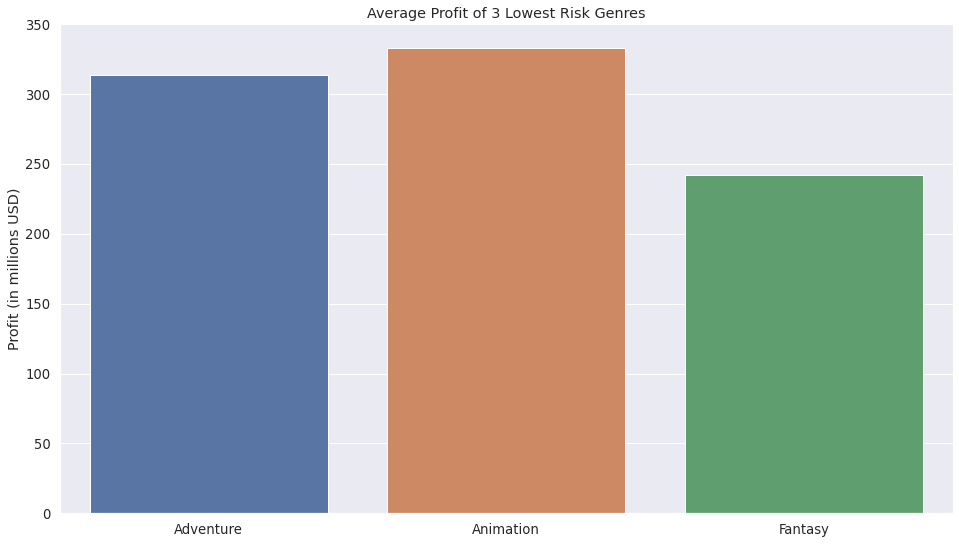

In [5]:
# genres we are interested in
impt_genres = ["Adventure", "Animation", "Fantasy"]
genre_mask = df.genres.isin(impt_genres)

# plot distribution of profit for these genres
fig, ax = plt.subplots(figsize=(16, 9))

sns.barplot(
    x="genres", y="profit", data=df.loc[genre_mask], ax=ax, order=impt_genres, ci=0
)

# adjust y axis
locs, _ = plt.yticks()
plt.yticks(ticks=locs, labels=[f"{i/1_000_000:,g}" for i in locs])

# title and axis labels
plt.title("Average Profit of 3 Lowest Risk Genres")
plt.ylabel("Profit (in millions USD)")
plt.xlabel("")

plt.show()

We can see that Animation not only has the lowest risk associated with it, as measured by it's profit margin distribution. It also ranks the highest in average profit, amongst the 3 low-risk genres. A safe bet for any new movie studio would be to produce an Animation movie.